# Grassmann Manifold

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy Grassmann class to
* compute distances;

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Grassmann class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from UQpy.DimensionReduction import Grassmann

Generate four random matrices with reduced rank corresponding to the different samples. The samples are stored in `matrices`.

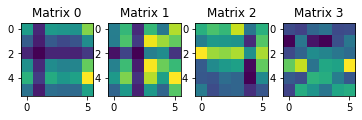

In [2]:
D1 = 6 
r0 = 2  # rank sample 0
r1 = 3  # rank sample 1
r2 = 4  # rank sample 2
r3 = 3  # rank sample 2

np.random.seed(1111) # For reproducibility.
# Solutions: original space.
Sol0 = np.dot(np.random.rand(D1, r0),np.random.rand(r0, D1))
Sol1 = np.dot(np.random.rand(D1, r1),np.random.rand(r1, D1))
Sol2 = np.dot(np.random.rand(D1, r2),np.random.rand(r2, D1))
Sol3 = np.dot(np.random.rand(D1, r3),np.random.rand(r3, D1))

# Creating a list of solutions.
matrices = [Sol0, Sol1, Sol2, Sol3]

# Plot the solutions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(Sol0)
ax2.title.set_text('Matrix 1')
ax2.imshow(Sol1)
ax3.title.set_text('Matrix 2')
ax3.imshow(Sol2)
ax4.title.set_text('Matrix 3')
ax4.imshow(Sol3)
plt.show()

Instatiate the UQpy class Grassmann considering the `"grassmann_distance"` as the a definition of distance on the manifold.

In [3]:
Gr = Grassmann(distance_method=Grassmann.grassmann_distance)
Gr.manifold(p="max", samples=matrices)

Compute the pairwise distances for $\Psi$ and $\Phi$, the left and right -singular eigenvectors, respectively, of singular value decomposition of each solution.

In [4]:
pairwise_distance = Gr.distance()
print(pairwise_distance)

([5.672445010189098, 5.664058185941887, 5.6501354127663, 5.518716995592778, 5.600693463203731, 5.644263815077632], [5.579426884482711, 5.608037612409704, 5.543827315815942, 5.666504342493751, 5.690649399963229, 5.698855657825887])


Compute the distance between 2 points.

In [5]:
distance01 = Gr.distance(points_grassmann=[Gr.psi[0],Gr.psi[1]])
print(distance01)

[5.672445010189098]


Compute the pairwise distances for $\Psi$ and $\Phi$, the left and right -singular eigenvectors, respectively, of singular value decomposition of each solution. In this case, use an user defined function `my_distance`.

In [6]:
from user_distance import my_distance

Gr = Grassmann(distance_method=my_distance)
Gr.manifold(p="max", samples=matrices)

pairwise_distance = Gr.distance()
print(pairwise_distance)


([3.616639470956335, 3.607360707699451, 3.6027491210519558, 3.521550317346858, 3.576688198896668, 3.6052053705707627], [3.565390259343567, 3.576785525166376, 3.539743386911009, 3.611513338062871, 3.63547752933254, 3.6418893560769394])
